# Analysis of a Star Wars Survey

In this project, we re-analyse survey data that had been collected by the [FiveThirtyEight](http://fivethirtyeight.com/) team in order to find out about which Star Wars movies liked best and which were their most (or least) favourite characters. The article written about the data can be found [here](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/), and the dataset itself can be downloaded [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

Let's start wirh loading and inspecting the data first.

## Loading and inspecting the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print(star_wars.head())
print('\n')
print(star_wars.info())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                Yes                      
1                                                NaN                      
2                                                 No                      
3                                                Yes                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

The dataset has N = 1186 cases and 38 columns, containing responses to very interesting questions such as "Have you seen any of the 6 films in the Star Wars franchise?" or "Do you consider yourself to be a fan of the Star Wars film franchise?" as well as basic demographic background information. 

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

There is at least one respondent who did not replay to any of the Star Wars related questions. We might consider dropping these kind of cases. Also the column names look very long and somewhat impractical to handle, as they contain the literal question wording.

## Two important indicators (cleaning and mapping yes/no columns)

We convert the responses to these yes/no questions to boolean values.

In [4]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print('\n')
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [5]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print('\n')
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleaning and mapping checkbox columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`
For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.
We will convert each of these columns to a Boolean, then rename the column something more intuitive (e.g. `seen_1`for someone who watched Episode 1 of the franchise and `seen_6` for someone who watched episode 6).

In [6]:
# List of column names and corresponding movie titles
columns = [
    'Which of the following Star Wars films have you seen? Please select all that apply.',
    'Unnamed: 4',
    'Unnamed: 5',
    'Unnamed: 6',
    'Unnamed: 7',
    'Unnamed: 8'
]

movies = [
    "Star Wars: Episode I  The Phantom Menace",
    "Star Wars: Episode II  Attack of the Clones",
    "Star Wars: Episode III  Revenge of the Sith",
    "Star Wars: Episode IV  A New Hope",
    "Star Wars: Episode V The Empire Strikes Back",
    "Star Wars: Episode VI Return of the Jedi"
]

# Create and apply mapping dictionaries using a loop
for col, movie in zip(columns, movies):
    star_wars[col] = star_wars[col].map({movie: True, np.nan: False})

# Rename columns
new_column_names = {old: f'seen_{i+1}' for i, old in enumerate(columns)}
star_wars = star_wars.rename(columns=new_column_names)

print(star_wars.columns)
print('\n')

for val in range(1, 7):
    print(star_wars[f'seen_{val}'].value_counts())


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you 

## Cleaning the ranking columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. We'll convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [10]:
# change type of columns [9:15] to float

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# rename those columns

star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
})

for val in range(1, 7):
    print(star_wars[f'ranking_{val}'].describe())

count    835.000000
mean       3.732934
std        1.656122
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: ranking_1, dtype: float64
count    836.000000
mean       4.087321
std        1.365365
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: ranking_2, dtype: float64
count    835.000000
mean       4.341317
std        1.400464
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        6.000000
Name: ranking_3, dtype: float64
count    836.000000
mean       3.272727
std        1.825901
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: ranking_4, dtype: float64
count    836.000000
mean       2.513158
std        1.578620
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: ranking_5, dtype: float64
count    836.000000
mean       3.047847


## Finding the highest-ranked movie

We will now identify the highest-ranking movie and plot a bar chart of the results. Lower ranking scores represent more popular options.

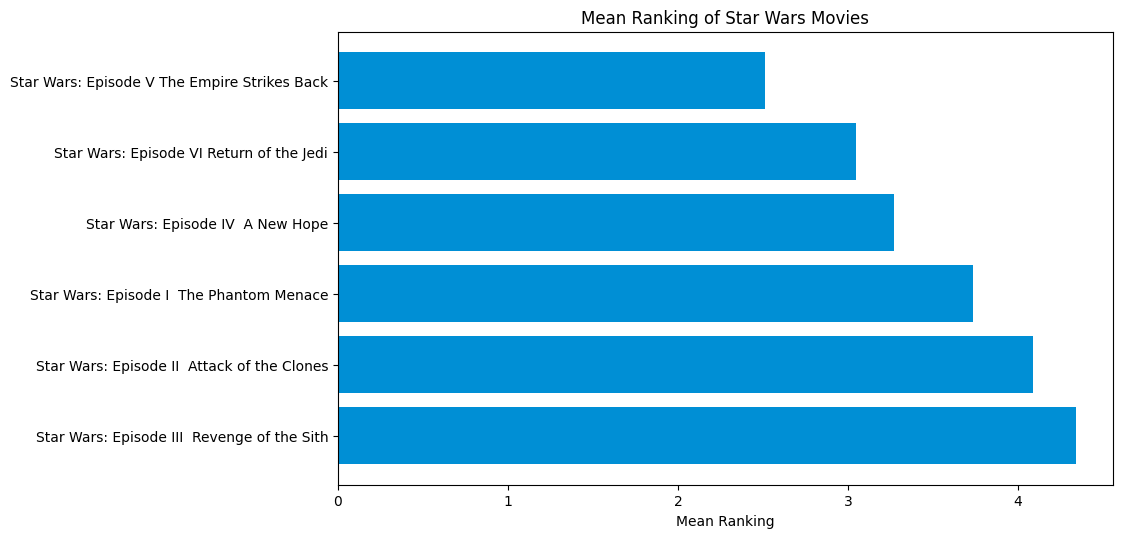

In [21]:
# assign rankings to a separate dataframe

rankings = star_wars[star_wars.columns[9:15]]

# take the list of movie names from above

movies = [
    "Star Wars: Episode I  The Phantom Menace",
    "Star Wars: Episode II  Attack of the Clones",
    "Star Wars: Episode III  Revenge of the Sith",
    "Star Wars: Episode IV  A New Hope",
    "Star Wars: Episode V The Empire Strikes Back",
    "Star Wars: Episode VI Return of the Jedi"
]


# make a pivot table

pivot_table = rankings.mean().reset_index()
pivot_table.columns = ['Movie', 'Mean Ranking']

# sort in ascending order

pivot_table = pivot_table.sort_values(by='Mean Ranking')  

# Assign the movie names to the sorted pivot table

pivot_table['Movie'] = [movies[i] for i in pivot_table.index]

# create the plot

plt.figure(figsize=(10, 6))
plt.barh(pivot_table['Movie'], pivot_table['Mean Ranking'], color='#008FD5')
plt.xlabel('Mean Ranking')
plt.title('Mean Ranking of Star Wars Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ranking at the top
plt.show()



We took the columns that contain the rankings `star_wars[star_wars.columns[9:15]]`and assigned them to their own dataframe. We then made a pivot table from those rankings, reflecting the mean ranking for each movie. We sorted the rankings by their value, so that the ranking of preferences comes out better. We then assigned the movie names as a separate column to the pivot table according to the sorted index in the pivot table. Finally, we plotted the results as a bar chart.

Our findings show that `The Empire Strikes Back` (Episode V, but the second Star Wars movie in chronological order) is the most popular movie and receives the lowest (= best) ranking overall. In second place we find `Return of the Jedi`(Episode VI, the third Star Wars movie in chronological order). Ranking third, we see the first and original Star Wars movie, `A New Hope` (Episode IV).

We probably should take into account that these raw averages are not telling us as much about different generations of Star Wars fans. Those growing up with the original movies might have just ranked them higher. The ones that never watched the original movies, might place the newer movies in the franchise higher.

## Finding the most viewed movie


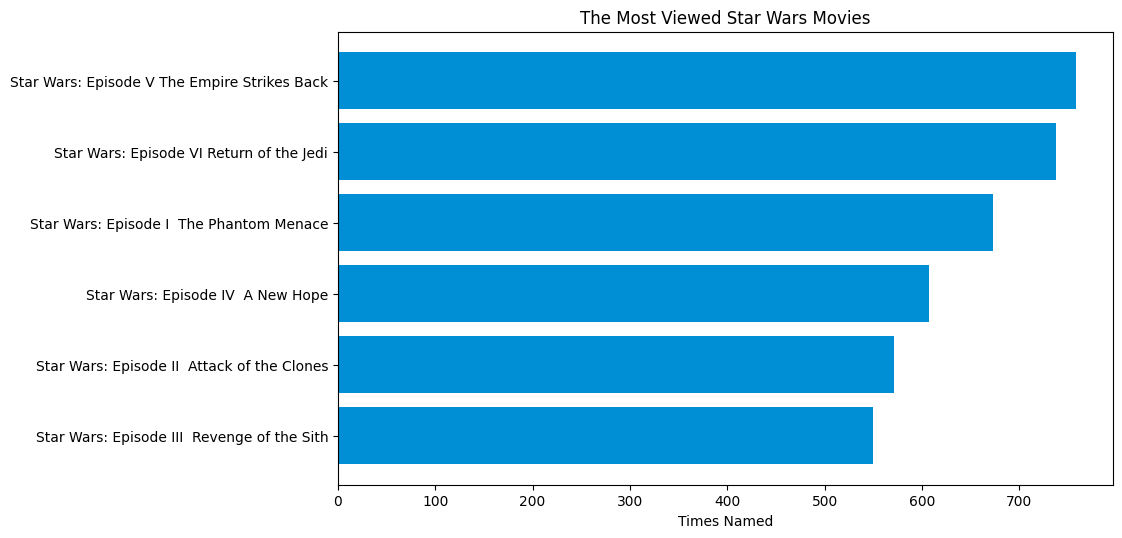

In [24]:
# assign seen variable to a separate dataframe

seen = star_wars[star_wars.columns[3:9]]

# take the list of movie names from above
# (see above)

# make a pivot table

pivot_table = seen.sum().reset_index()
pivot_table.columns = ['Movie', 'Times Named']

# sort in ascending order

pivot_table = pivot_table.sort_values(by='Times Named')  

# Assign the movie names to the sorted pivot table

pivot_table['Movie'] = [movies[i] for i in pivot_table.index]

# create the plot

plt.figure(figsize=(10, 6))
plt.barh(pivot_table['Movie'], pivot_table['Times Named'], color='#008FD5')
plt.xlabel('Times Named')
plt.title('The Most Viewed Star Wars Movies')
#plt.gca().invert_yaxis()  # Not inverting this time.
plt.show()


By this simple metric, the number of times a movie was named to having been watched by the respondents, the most watched movie is `The Empire Strikes Back`. This matches with its high ranking in the previous plot. The second most watched movie is `Return of the Jedi`, and in rank three `The Phantom Menace`.

## Exploring the data by binary segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. We will consider how self-reported Star Wars and those not considering themselves as such differ with regard to mean rankings and most watched Star Wars movie. 

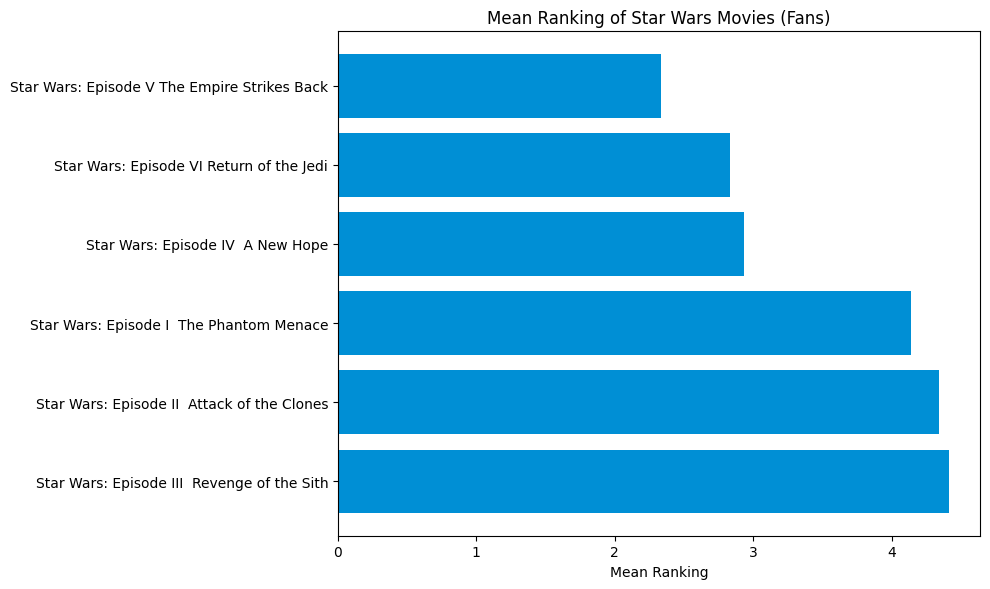

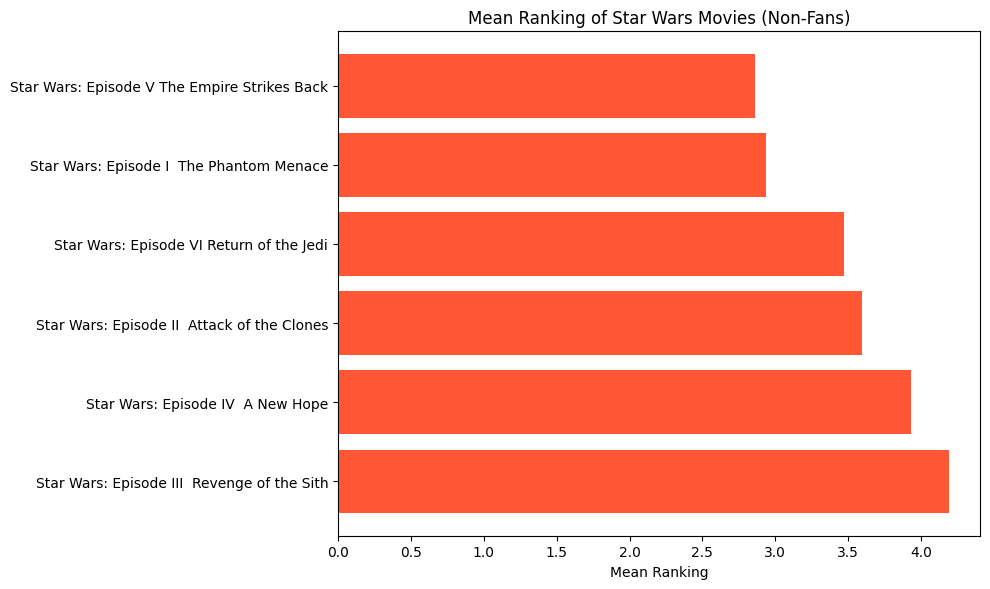

In [31]:
# select fans vs no fans

star_wars_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
star_wars_nofan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

# Create ranking dataframes based on this
rankings_fan = star_wars_fan.loc[:, star_wars.columns[9:15]]
rankings_nofan = star_wars_nofan.loc[:, star_wars.columns[9:15]]

# movie list had already been created above

# Create pivot tables
pivot_table_fan = rankings_fan.mean().reset_index()
pivot_table_fan.columns = ['Movie', 'Mean Ranking']
pivot_table_fan = pivot_table_fan.sort_values(by='Mean Ranking')
pivot_table_fan['Movie'] = [movies[i] for i in pivot_table_fan.index]

pivot_table_nofan = rankings_nofan.mean().reset_index()
pivot_table_nofan.columns = ['Movie', 'Mean Ranking']
pivot_table_nofan = pivot_table_nofan.sort_values(by='Mean Ranking')
pivot_table_nofan['Movie'] = [movies[i] for i in pivot_table_nofan.index]

# Plotting for fans
fig_fan, ax_fan = plt.subplots(figsize=(10, 6))
ax_fan.barh(pivot_table_fan['Movie'], pivot_table_fan['Mean Ranking'], color='#008FD5')
ax_fan.set_title('Mean Ranking of Star Wars Movies (Fans)')
ax_fan.set_xlabel('Mean Ranking')
ax_fan.invert_yaxis()  # Invert y-axis to have the highest ranking at the top
plt.tight_layout()
plt.show()

# Plotting for non-fans
fig_nofan, ax_nofan = plt.subplots(figsize=(10, 6))
ax_nofan.barh(pivot_table_nofan['Movie'], pivot_table_nofan['Mean Ranking'], color='#FF5733')
ax_nofan.set_title('Mean Ranking of Star Wars Movies (Non-Fans)')
ax_nofan.set_xlabel('Mean Ranking')
ax_nofan.invert_yaxis()  # Invert y-axis to have the highest ranking at the top
plt.tight_layout()
plt.show()



On the technical side, we now first selected Star Wars Fans and Not Fans and then calculated the ranking for each groups separately. For this, we constructed separate dataframes for each group. We also plotted the bar graphs separately, so that differences in the rankings would become clear.

Comparing Star Wars Fans to those not identifying as Star Wars Fans, we can find interesting differences. While amon self-reported fans the ranking pretty much mirrors the overall ranking above, with all the new movies being ranked similarly low, the results are different for the no-fans. Those not identifying as Star Wars Fans rank `The Empire Strikes Back` highest, followed by the newer movie in the franchise `The Phantom Menace`. In the third place we see `Return of the Jedi`. But the classic first Star Wars movie `A New Hope` is not much liked in this group. Let's look at the total number of times the movie has been reported as watched in each of the groups.

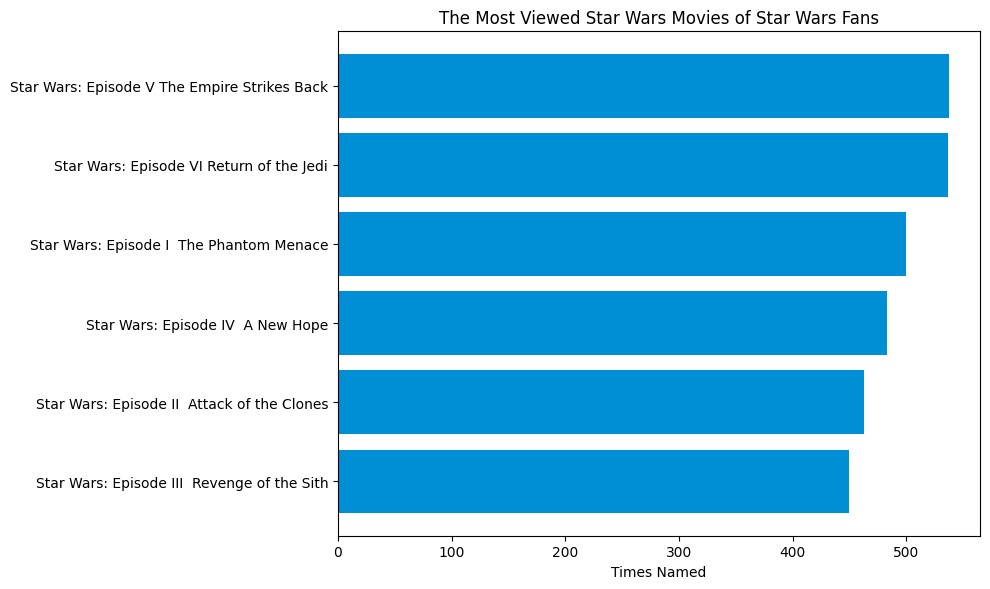

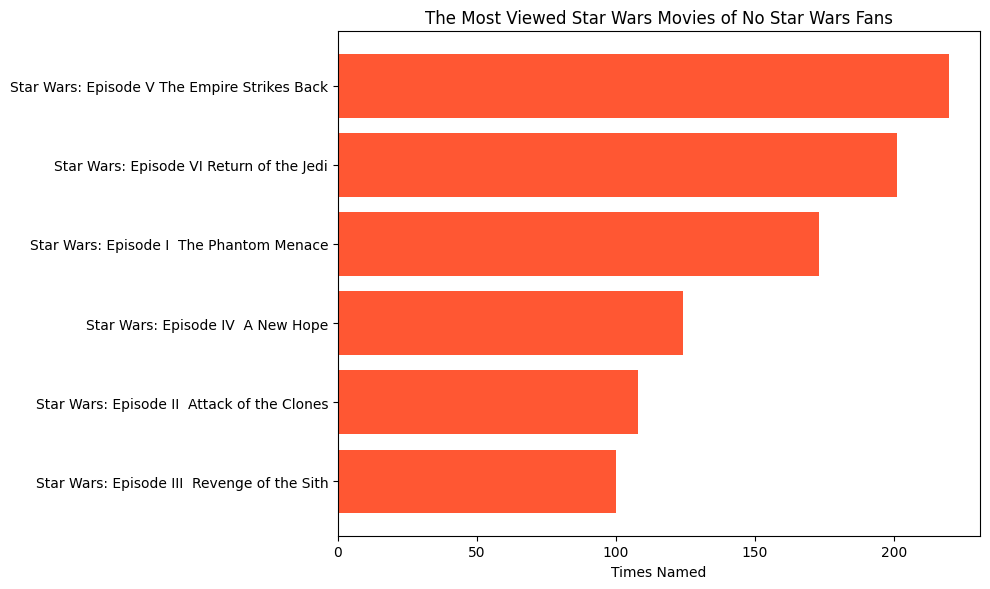

In [34]:
# Create seen dataframes based on groups
seen_fan = star_wars_fan.loc[:, star_wars.columns[3:9]]
seen_nofan = star_wars_nofan.loc[:, star_wars.columns[3:9]]

# movie list had already been created above

# Create pivot tables
pivot_table_fan = seen_fan.sum().reset_index()
pivot_table_fan.columns = ['Movie', 'Times Named']
pivot_table_fan = pivot_table_fan.sort_values(by='Times Named')
pivot_table_fan['Movie'] = [movies[i] for i in pivot_table_fan.index]

pivot_table_nofan = seen_nofan.sum().reset_index()
pivot_table_nofan.columns = ['Movie', 'Times Named']
pivot_table_nofan = pivot_table_nofan.sort_values(by='Times Named')
pivot_table_nofan['Movie'] = [movies[i] for i in pivot_table_nofan.index]

# Plotting for fans
fig_fan, ax_fan = plt.subplots(figsize=(10, 6))
ax_fan.barh(pivot_table_fan['Movie'], pivot_table_fan['Times Named'], color='#008FD5')
ax_fan.set_title('The Most Viewed Star Wars Movies of Star Wars Fans')
ax_fan.set_xlabel('Times Named')
#ax_fan.invert_yaxis()  # Invert y-axis to have the highest ranking at the top
plt.tight_layout()
plt.show()

# Plotting for non-fans
fig_nofan, ax_nofan = plt.subplots(figsize=(10, 6))
ax_nofan.barh(pivot_table_nofan['Movie'], pivot_table_nofan['Times Named'], color='#FF5733')
ax_nofan.set_title('The Most Viewed Star Wars Movies of No Star Wars Fans')
ax_nofan.set_xlabel('Times Named')
#ax_nofan.invert_yaxis()  # Invert y-axis to have the highest ranking at the top
plt.tight_layout()
plt.show()

The results show that the ordering in terms of how often a movie has been reported as watched does not differ between fans and non-fans. The most watche dmovie in both groups is `The Empire Strikes Back`, followed by `Return of the Jedi` and `The Phantom Menace`. One differences that can be identified is that the non-fans have more often not watched the remaining three movies, wherase among the self-reported fans the raw number os having watched a movie are not that different. The fans overall have watched all movies roughly to a similar extent.